# t-SNE

In [4]:
from sklearn.datasets import make_blobs, make_swiss_roll, make_moons, load_sample_image, load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering, KMeans
import numpy as np
from sklearn.neighbors import kneighbors_graph
from scipy.sparse import csr_matrix, identity
from scipy.sparse.linalg import eigsh
from sklearn.preprocessing import StandardScaler

<h3 style="background-color: #c39bd3">
    1. Effectuer t-SNE sur le dataset digits de sklearn. Faire varier la perplexité et commenter.
</h3>

In [2]:
from sklearn.manifold import TSNE

In [28]:
digits = load_digits()
X = digits.data
y = digits.target

In [30]:
perplexity = [3,5,10,15,30]

In [31]:
embeddings = []
for i in perplexity :
    X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=i).fit_transform(X)
    embeddings.append(X_embedded)

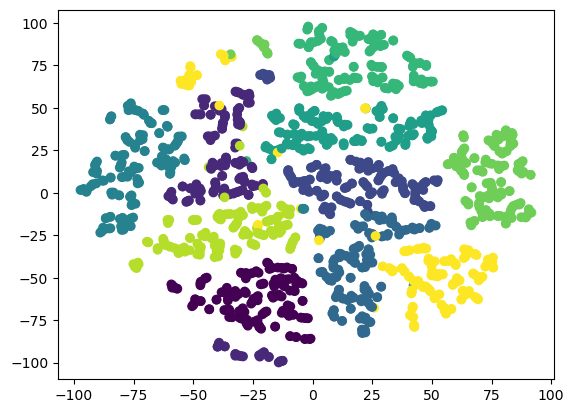

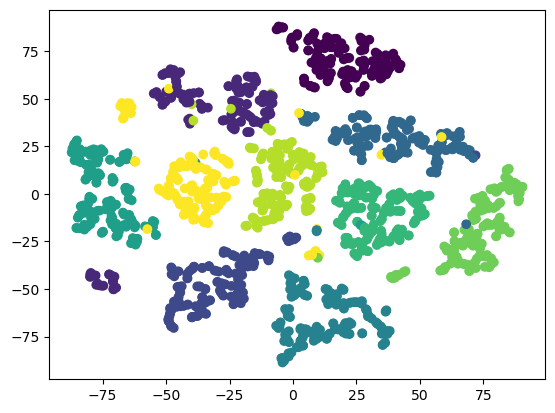

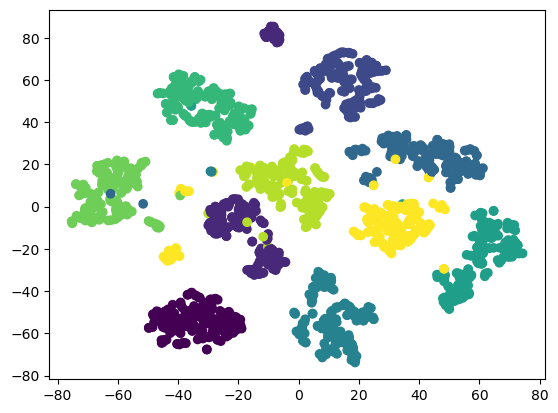

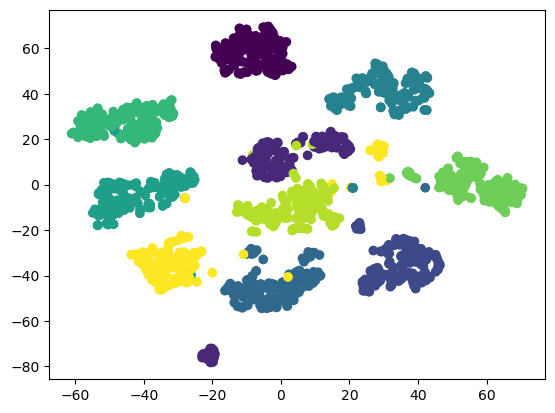

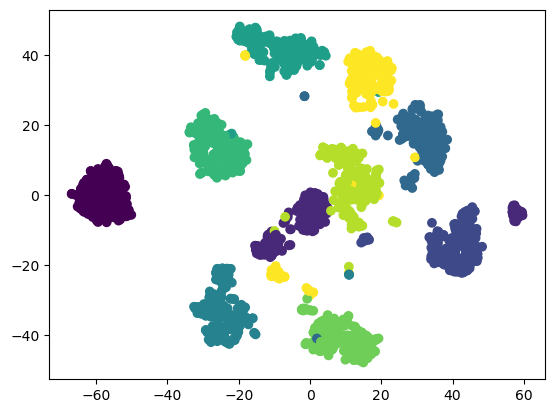

In [32]:
for i in range(0,len(embeddings)):
    plt.scatter(embeddings[i][:,0],embeddings[i][:,1], c=y)
    plt.show()

Plus la complexité augmente, plus les cluster sont "efficaces" pour regrouper les données avec les mêmes labels.

# Spectral Clustering

<h3 style="background-color: #c39bd3">
    2. Calculer les k plus proches voisins du jeu de données suivants. Expliquer ce que signifie le paramètre shuffle
</h3>

In [34]:
n = 200
blobs, yb = make_blobs(n_samples=n, n_features=2,  centers=3, random_state=17, shuffle=False)

In [72]:
knn = []
k = 5
for x1 in blobs:
    distances = []
    index = 0
    for x2 in blobs:
        distances.append((np.linalg.norm(x1 -x2), index))
        index += 1
        if index == 199:
            distances.sort()
            knn.append(distances[1:k])

In [73]:
knn

[[(0.6547221615705856, 50),
  (0.7566583035900069, 45),
  (1.0193520700499037, 15),
  (1.0213542123184978, 57)],
 [(0.2711494249624422, 2),
  (0.40880585154917776, 19),
  (0.4183152633035406, 24),
  (0.49668251378835004, 28)],
 [(0.17266978775116118, 24),
  (0.2573334119623203, 19),
  (0.2711494249624422, 1),
  (0.3427733454375272, 9)],
 [(0.7555041065059074, 50),
  (0.771363025950948, 32),
  (0.8931339443639204, 57),
  (1.1678532860686184, 45)],
 [(0.3038917964336036, 58),
  (0.6755513062022185, 11),
  (0.7351606185895956, 7),
  (0.8154836613179535, 54)],
 [(0.33557893159892827, 66),
  (0.3662910599734761, 52),
  (0.8793473550115611, 39),
  (0.9811835115850799, 23)],
 [(0.14040050689689443, 42),
  (0.3317242383458548, 59),
  (0.475318673182974, 13),
  (0.5194759460750972, 40)],
 [(0.19876347464206093, 53),
  (0.35547380260493466, 33),
  (0.37853477528967344, 54),
  (0.41148736761445737, 62)],
 [(0.4028753275077532, 26),
  (0.5632242729036703, 43),
  (0.5988633032756112, 38),
  (0.6617

avec shuffle = False, les étiquettes ne sont pas mélangées.

<h3 style="background-color: #c39bd3">
    3. Afficher le jeu de données et les arêtes entre les voisins.
</h3>

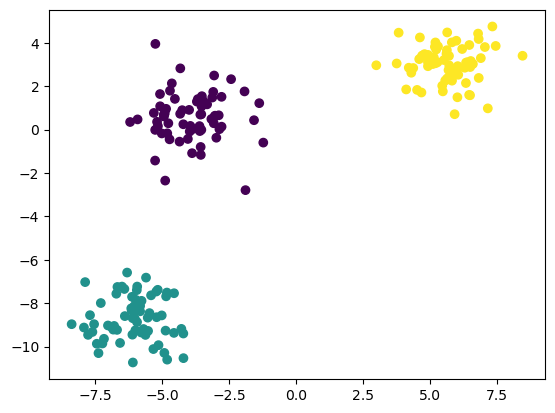

In [76]:
plt.scatter(blobs[:,0], blobs[:,1], c=yb)

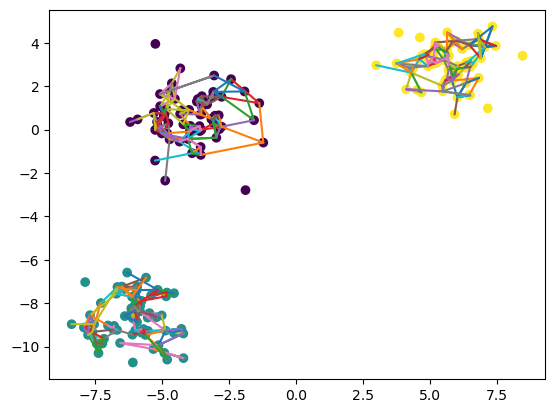

In [109]:
plt.scatter(blobs[:,0], blobs[:,1], c=yb)
for i in knn:
    voisins = []
    for x in i:
        voisins.append(blobs[x[1]])
    voisins = np.array(voisins)
    plt.plot(voisins[:, 0],voisins[:,1])

<h3 style="background-color: #c39bd3">
    4. Écrire un fonction prenant en argument un jeu de données et qui retourne une matrice carrée symétrique d'adjacence avec soit des poids tous égaux à 1, soit avec une mesure de similarité
</h3>

In [ ]:
def A(X, k, weight="allones"):
    pass

<h3 style="background-color: #c39bd3">
    5. Écrire un fonction qui calcule le laplacian d'un jeu de données en utilisant la fonction précédente et afficher le résultat sur le jeu de données avec `imshow`
</h3>

<h3 style="background-color: #c39bd3">
    6. Calculer les valeurs et vecteurs propres du laplacien du jeu de données. Afficher les valeurs propres et commenter.
</h3>

<h3 style="background-color: #c39bd3">
    7. Afficher les valeurs des 3 premiers vecteurs propres sur 3 graphiques côte à côte (un sur chaque graphique). Comparer avec des vecteurs propres associés à de grandes valeurs propres. (Expliquer la structure observée dans le cas des petites valeurs propres)
</h3>

<h3 style="background-color: #c39bd3">
   8. Écrire une fonction qui calcule l'embedding spectral
</h3>

In [ ]:
def emb_spectral(n_neigh, n_clusters, weight, lap_type):
    pass

<h3 style="background-color: #c39bd3">
   9. Réaliser un clustering spectral en finalisant par un K-means.
</h3>

<h3 style="background-color: #c39bd3">
   10. Simuler 5 jeux de données en forme de demi-lunes avec différents niveaux de bruits, tracer côte à côte le dataset, les petites valeurs propres, la projection sur les deux valeurs propres et le résultat du clustering spectral. Commenter.
</h3>

<h3 style="background-color: #c39bd3">
   11. (Optionnel) Générer un swiss roll coloré et le plongement en deux dimensions, c'est-à-dire les points de coordonnées les deux derniers vecteurs propres. Commenter.
</h3>

<h3 style="background-color: #c39bd3">
   12. (Optionnel) Réaliser un Kmeans sur les pixels de l'image et afficher l'image résultante
</h3>

In [ ]:
import cv2
china = load_sample_image("china.jpg")
china_small = cv2.resize(china, (128,84), interpolation = cv2.INTER_AREA)
w, h, d = tuple(china_small.shape)
image_array = np.reshape(china_small, (w * h, d))
scaler = StandardScaler()
scaler.fit_transform(image_array)
plt.imshow(china_small)

<h3 style="background-color: #c39bd3">
   13. (Optionnel) Faire un clustering spectral et afficher l'image résultante. Afficher les valeurs propres pour choisir le nombre de classes et le nombre de voisins.
</h3>